#Classification using Support Vector Machine
Please do not import any other python library except numpy and matplotlib 

In [0]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

#Generating Random linearly separable data


In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]

for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)

#Visualizing the above data

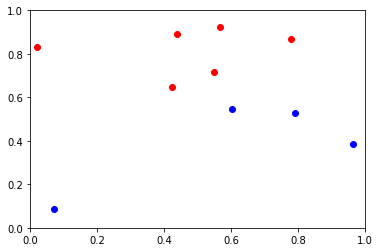

In [31]:
plt.figure(1)
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)

#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
Implemented from [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper.

In [0]:
def svm_function(x, y, epoch, l_rate,f):
    # f is the number of features including bias
    w=np.zeros((1,f)) #making initial weights
    Z=np.ones((len(data),1))
    I=np.hstack([X,Z]) 
    for t in range(1,epoch):
        i=np.random.randint(0,len(data))
        n=1/(l_rate*t)
        if I[i].dot(w.transpose())*Y[i] < 1:
             w = (1-n*l_rate)*w +n*Y[i]*I[i]
        else:
            w=(1-n*l_rate)*w 
    return w

#Run SVM Classifier

In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 20000, 0.001,3)

#Visualize the classifier
Written a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

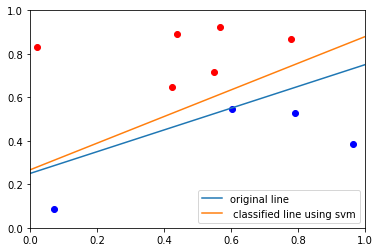

In [34]:
plt.figure(1)
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    
    
x=np.linspace(0,1,100) 
y=0.5*x+0.25; #original line

y_w= (w[0,0]*x + w[0,2])/((-1)*w[0,1]) #line equation from svm method
plt.figure(1)
plt.plot(x,y,label='original line')
plt.plot(x,y_w,label=' classified line using svm')
plt.legend()
plt.show()
    
    

Increase the number of data-points and observed number of epochs to converge. Below plots shows data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points.subplot function is used to plot figures.

Text(0.5, 1.0, 'data point=100')

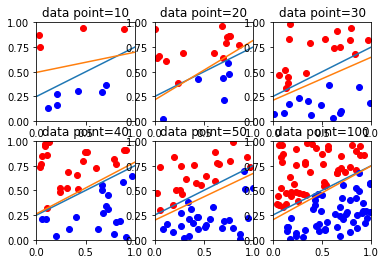

In [35]:
def data_func_without_noise(n,epoch,l_rate,f): #n is the number of data points and this fuction generates the data and return data and weights of linear classifier
 
    data = [[np.random.rand(), np.random.rand()] for i in range(n)]

    for i, point in enumerate(data):
        x, y = point
        if 0.5*x - y + 0.25 > 0:
            data[i].append(-1)
        else:
            data[i].append(1)

    data = np.asarray(data)
    X = data[:,:2]
    Y = data[:,2]

    
    w=np.zeros((1,f))
    Z=np.ones((len(data),1))
    I=np.hstack([X,Z])
    for t in range(1,epoch):
        i=np.random.randint(0,len(data))
        n=1/(l_rate*t)
        if I[i].dot(w.transpose())*Y[i] < 1:
             w = (1-n*l_rate)*w +n*Y[i]*I[i]
        else:
            w=(1-n*l_rate)*w 
    x=np.linspace(0,1,100)
    y=0.5*x+0.25;
    y_w= (w[0,0]*x + w[0,2])/((-1)*w[0,1])
        #print(I)
    return(x,y,y_w,data)
def data_scatter(data):  #this function genrates scatter data 
   for x, y, l in data:
       if l == 1:
           clr = 'red'
       else:
           clr = 'blue'
       plt.xlim(0,1)
       plt.ylim(0,1)        
       plt.scatter(x, y, c=clr)
   return  

[x_10,y_10,y_w_10,data_10]=data_func_without_noise(10,10000,0.001,3)
[x_20,y_20,y_w_20,data_20]=data_func_without_noise(20,10000,0.001,3)
[x_30,y_30,y_w_30,data_30]=data_func_without_noise(30,10000,0.001,3)
[x_40,y_40,y_w_40,data_40]=data_func_without_noise(40,10000,0.001,3)
[x_50,y_50,y_w_50,data_50]=data_func_without_noise(50,10000,0.001,3)
[x_100,y_100,y_w_100,data_100]=data_func_without_noise(100,10000,0.001,3)

# plotting differnt data points using subplot

plt.figure()
plt.subplot(2,3,1)
plt.plot(x_10,y_10)
plt.plot(x_10,y_w_10)
scatter_10=data_scatter(data_10)
plt.title('data point=10')

plt.subplot(2,3,2)
plt.plot(x_20,y_20)
plt.plot(x_20,y_w_20)
scatter_20=data_scatter(data_20)
plt.title('data point=20')

plt.subplot(2,3,3)
plt.plot(x_30,y_30)
plt.plot(x_30,y_w_30)
scatter_30=data_scatter(data_30)
plt.title('data point=30')

plt.subplot(2,3,4)
plt.plot(x_40,y_40)
plt.plot(x_40,y_w_40)
scatter_40=data_scatter(data_40)
plt.title('data point=40')

plt.subplot(2,3,5)
plt.plot(x_50,y_50)
plt.plot(x_50,y_w_50)
scatter_50=data_scatter(data_50)
plt.title('data point=50')

plt.subplot(2,3,6)
plt.plot(x_100,y_100)
plt.plot(x_100,y_w_100)
scatter_100=data_scatter(data_100)
plt.title('data point=100')


#Perturbing the previously created  data
Add noise to the data and visualized the resulting classifier.




In [0]:

for i in range(len(data)):
  data[i][0] += (np.random.rand() - 0.5) / 2.
  data[i][1] += (np.random.rand() - 0.5) / 2.

#Visualizing the perturbed Data

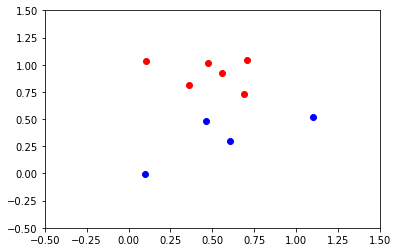

In [37]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(-0.5,1.5)
  plt.ylim(-0.5,1.5)

#Visualize the classifier trained on noisy data
actual seperating line and seperating line got from svm_classifier using 10, 20, 30, 40, 50 and 100 data points. . 

Text(0.5, 1.0, 'data point=100')

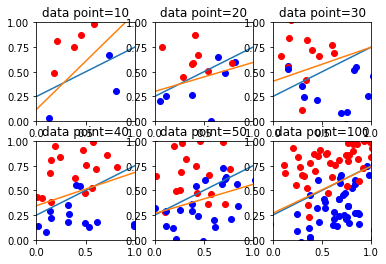

In [38]:
def data_func_noise(n,epoch,l_rate,f):    #this fuction generates the noisy data and return data and weights of linear classifier
 

    
 
    data = [[np.random.rand(), np.random.rand()] for i in range(n)]

    for i, point in enumerate(data):
        x, y = point
        if 0.5*x - y + 0.25 > 0:
            data[i].append(-1)
        else:
            data[i].append(1)
    
    for j in range(len(data)):
        
        data[j][0] += (np.random.rand() - 0.5) / 2
        data[j][1] += (np.random.rand() - 0.5) / 2
    
  
    



    data = np.asarray(data)
    X = data[:,:2]
    Y = data[:,2]

    
    w=np.zeros((1,f))
    Z=np.ones((len(data),1))
    I=np.hstack([X,Z])
    for t in range(1,epoch):
        i=np.random.randint(0,len(data))
        n=1/(l_rate*t)
        if I[i].dot(w.transpose())*Y[i] < 1:
             w = (1-n*l_rate)*w +n*Y[i]*I[i]
        else:
            w=(1-n*l_rate)*w 
    x=np.linspace(0,1,100)
    y=0.5*x+0.25;
    y_w= (w[0,0]*x + w[0,2])/((-1)*w[0,1])
        #print(I)
    return(x,y,y_w,data)


def data_scatter(data):
   for x, y, l in data:
       if l == 1:
           clr = 'red'
       else:
           clr = 'blue'
       plt.xlim(0,1)
       plt.ylim(0,1)        
       plt.scatter(x, y, c=clr)
   return
[x_10,y_10,y_w_10,data_10]=data_func_noise(10,10000,0.0001,3)
[x_20,y_20,y_w_20,data_20]=data_func_noise(20,10000,0.0001,3)
[x_30,y_30,y_w_30,data_30]=data_func_noise(30,10000,0.0001,3)
[x_40,y_40,y_w_40,data_40]=data_func_noise(40,10000,0.0001,3)
[x_50,y_50,y_w_50,data_50]=data_func_noise(50,10000,0.0001,3)
[x_100,y_100,y_w_100,data_100]=data_func_noise(100,10000,0.0001,3)
# # plotting differnt data points using subplot
# red line classified line using svm and blue line original line
plt.figure()
plt.subplot(2,3,1)
plt.plot(x_10,y_10)
plt.plot(x_10,y_w_10)
scatter_10=data_scatter(data_10)
plt.title('data point=10')

plt.subplot(2,3,2)
plt.plot(x_20,y_20)
plt.plot(x_20,y_w_20)
scatter_20=data_scatter(data_20)
plt.title('data point=20')

plt.subplot(2,3,3)
plt.plot(x_30,y_30)
plt.plot(x_30,y_w_30)
scatter_30=data_scatter(data_30)
plt.title('data point=30')

plt.subplot(2,3,4)
plt.plot(x_40,y_40)
plt.plot(x_40,y_w_40)
scatter_40=data_scatter(data_40)
plt.title('data point=40')

plt.subplot(2,3,5)
plt.plot(x_50,y_50)
plt.plot(x_50,y_w_50)
scatter_50=data_scatter(data_50)
plt.title('data point=50')

plt.subplot(2,3,6)
plt.plot(x_100,y_100)
plt.plot(x_100,y_w_100)
scatter_100=data_scatter(data_100)
plt.title('data point=100')

# Validation on non linear data
#Random Non-linear data stored in CSV1 and visualize it

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


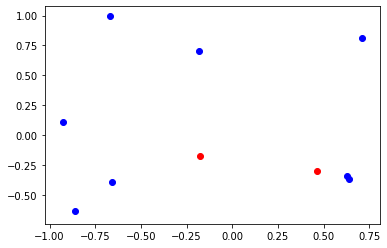

In [39]:
from google.colab import drive
drive.mount('/content/drive')

data_1=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/ml_assignment_1/csv1.csv',delimiter=',')  #reading data from csv file





# plotting data points
for x, y , l in data_1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
  
    plt.scatter(x, y, c=clr)





   

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, for this transform the data in a space where it can be linearly seprable. Features can be exponential, polynomial, trignometric or any other function of actual input features. 


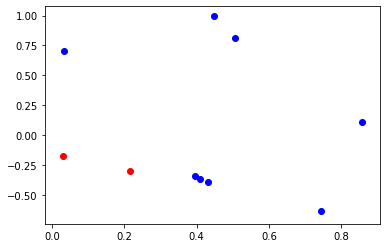

In [40]:

f= 3  #number of features
x_1=np.square(data_1[:,0]) # applying feature to first column of data
x_2= (data_1[:,1])    # apllyig fearture to second colunm of data
x_3=data_1[:,2]

data_2=np.vstack([x_1,x_2,x_3])

data=data_2.T
#plotting transformed data and findinhg weather the data is linearly classify or not
for x, y , l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
  
    plt.scatter(x, y, c=clr)


X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 12000, 0.00001,3)




#Visualized decision boundary


[[-1.69604266e+01 -1.57559167e+01 -8.04164543e-15]]


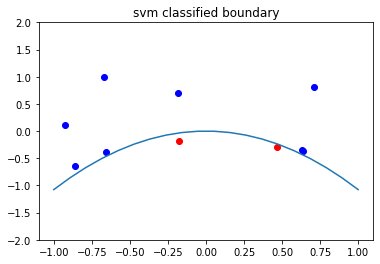

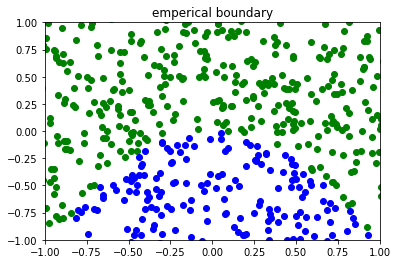

In [41]:
plt.figure(1)
for x, y , l in data_1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
  
    plt.scatter(x, y, c=clr)
    plt.ylim(-2,2)

x=np.linspace(-1,1,20)
y_w= (w[0,0]*(x**2) + w[0,2])/((-1)*w[0,1])
print(w)
plt.plot(x,y_w)
plt.title('svm classified boundary')
plt.figure(3)
# plotting imperical boundary
data = [[np.random.randn(), np.random.randn()] for i in range(1000)]
for i, point in enumerate(data):
    x, y = point
    if w[0,0]*x**2  +w[0,1]* y + w[0,2] > 0:
        data[i].append(-1)
    else:
        data[i].append(1)
for x, y, l in data:
    if l == 1: 
        clr = 'green'
    else: 
         clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.title('emperical boundary')
    plt.xlim(-1,1)
    plt.ylim(-1,1) 

#Read the Random Non-linear data stored in CSV2

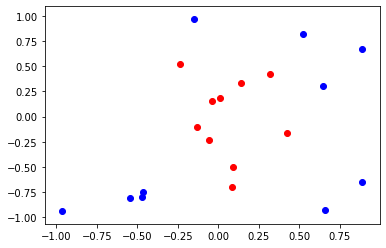

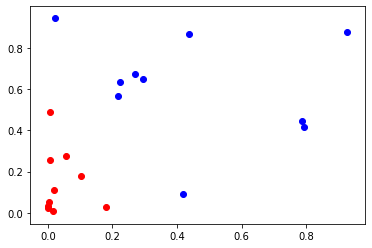

In [42]:
data_1=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/ml_assignment_1/csv2.csv',delimiter=',')###################################
data_1
plt.figure(1)
for x, y , l in data_1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
  
    plt.scatter(x, y, c=clr)
#feature extraction number of feature is 5 total incliding bias
x_01=(data_1[:,0])
x_02=(data_1[:,1])
x_1=((data_1[:,0]))**2
x_2= (((data_1[:,1])))**2
x_3=(data_1[:,2])
 
data_2=np.vstack([x_01,x_02,x_1,x_2,x_3])
data=data_2.T
for p,q,x, y , l in data:  # visulizing transformed data
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.figure(2)  
    plt.scatter(x, y, c=clr)





#Train a SVM classifier on the non linear data by appropriate features and also visualise it

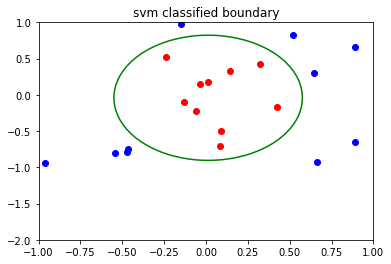

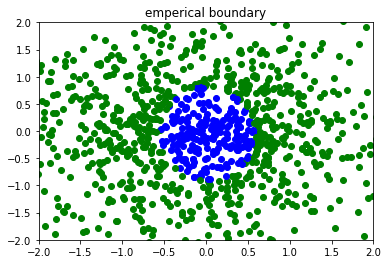

In [43]:
X = data[:,:4]
Y = data[:,4]
w = svm_function(X, Y, 20000, 0.001,5)
plt.figure(1)
for x, y , l in data_1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
  
    plt.scatter(x, y, c=clr)
    plt.ylim(-2,1)
    
plt.figure(1)
x=np.linspace(-1,1,50)
y=np.linspace(-2,1,50)
def f(x,y):
     return x*w[0,0]+y*w[0,1]+x**2*w[0,2]+ y**2*w[0,3]+ w[0,4]
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
plt.contour(X,Y,Z,[0],colors='green');# plotting cotour returned from svm
plt.title('svm classified boundary')

data = [[np.random.randn(), np.random.randn()] for i in range(1000)]
for i, point in enumerate(data):
    x, y = point
    if f(x,y) > 0:
        data[i].append(-1)
    else:
        data[i].append(1)
for x, y, l in data:
    if l == 1: 
        clr = 'green'
    else: 
         clr = 'blue'
    plt.figure(2)
    plt.scatter(x, y, c=clr)
    plt.title('emperical boundary')
    plt.xlim(-2,2)
    plt.ylim(-2,2)  

#Read the Random Non-linear data stored in CSV3

In [0]:
  data_1=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/ml_assignment_1/csv3.csv',delimiter=',') # data reading

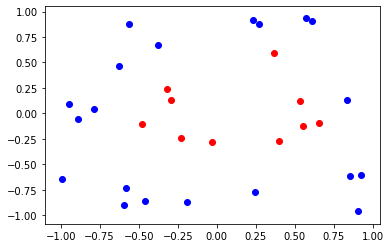

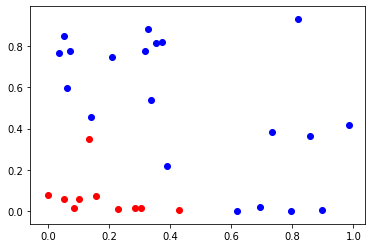

In [45]:
data_1
for x, y , l in data_1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.figure(1)
    plt.scatter(x, y, c=clr)
#feature extraction
x_01=(data_1[:,0])
x_02=(data_1[:,1])
x_1=((data_1[:,0]))**2
x_2= (((data_1[:,1])))**2
x_3=np.multiply(x_1,x_2)
x_4=(data_1[:,2])

 
data_2=np.vstack([x_01,x_02,x_1,x_2,x_3,x_4])

data=data_2.T    

for p,q,x, y ,z, l in data:    
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.figure(2)
    plt.scatter(x, y, c=clr)    #visulizing transformed data and detremined this data is linearly classified






#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

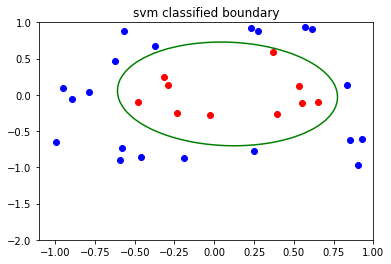

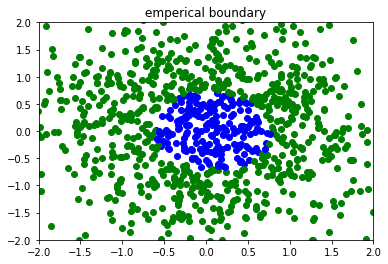

In [46]:
X = data[:,:5]
Y = data[:,5]
w = svm_function(X, Y, 20000, 0.001,6)

plt.figure(1)
for x, y , l in data_1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
  
    plt.scatter(x, y, c=clr)   # actual scatter data
    plt.ylim(-2,1)
    

plt.figure(1)
x=np.linspace(-1,1,50)
y=np.linspace(-2,1,50)
def f(x,y):
     return x*w[0,0]+y*w[0,1]+x**2*w[0,2]+ y**2*w[0,3]+ np.multiply(x,y)*w[0,4]+w[0,5]
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
plt.contour(X,Y,Z,[0],colors='green');    #desicion boundary 
plt.title('svm classified boundary')


data = [[np.random.randn(), np.random.randn()] for i in range(1000)]
for i, point in enumerate(data):
    x, y = point
    if f(x,y) > 0:
        data[i].append(-1)
    else:
        data[i].append(1)

for x, y, l in data:
    if l == 1: 
        clr = 'green'
    else: 
         clr = 'blue'
    plt.figure(2)
    plt.scatter(x, y, c=clr)             # plot of imperical boundary
    plt.title('emperical boundary')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
  
    